<a href="https://colab.research.google.com/github/josesg998/redesn_2024/blob/main/Clase%201/Ejercicio_5a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios semana 1

## Ejercicio 5

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
#!unzip Imágenes.zip

Archive:  Imágenes.zip
replace Imagen 1.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
def plot_metric(history, metric):
  plt.plot(history.history[metric], label='Training data')
  plt.plot(history.history['val_' + metric], label='Validation data')
  plt.title(metric)
  plt.ylabel(metric)
  plt.xlabel('Epoch')
  plt.legend(loc="upper right")
  plt.show()

def open_image(archivo):
    datos = np.array(plt.imread(archivo))
    sh=np.shape(datos)
    datos2 = []
    colores = []
    for i in range(sh[0]):
        for j in range(sh[1]):
            color = datos[i][j][0] + datos[i][j][1] * 255 + datos[i][j][2] * 255 * 255

            if(color != 16646655):
                if not (color in colores):
                    colores.append(color)
                color = colores.index(color)

                datos2.append([j, 1000 - i, color])

    return np.array(datos2)

def plot_image(P, T):
    marcadores = {0:('+','b'), 1:('o','g'), 2:('x', 'y'), 3:('*', 'm'), 4:('.', 'r'), 5:('+', 'k')}

    plt.clf()
    gs = gridspec.GridSpec(1, 1)
    ax = plt.subplot(gs[0, 0])

    # Muestras
    for class_value in np.unique(T):
        x = []
        y = []
        for i in range(len(T)):
            if T[i] == class_value:
                x.append(P[i, 0])
                y.append(P[i, 1])
        ax.scatter(x, y, marker=marcadores[class_value][0], color=marcadores[class_value][1])
    plt.show()


### Imágen 1

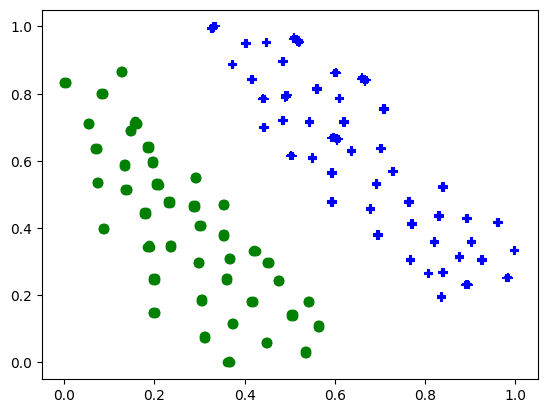

In [9]:
file_name = "Imagen 1.bmp" # Nombre del archivo con la imagen a analizar

X = open_image(file_name)

X = np.random.permutation(X)
T = X[:, 2]    # Variable objetivo (Clase de 0 a N)
P = X[:, 0:2]  # Variables de entrada (X y Y de los píxeles no-blancos de la imagen)

# Número de clases del problema (Cantidad de colores no-blancos de la imagen)
nclases = max(T) + 1

# Crear la salida con codificación one-hot
T_OH = [T==0]
for i in range(1,nclases):
  T_OH = np.concatenate( (T_OH, [T==i]), axis=0)
T_OH = T_OH.astype(int).T

# Escalar la entrada a valores [0..1]
column_min_values = np.min(P, axis=0)
P = (P - column_min_values) / (np.max(P, axis=0) - column_min_values)

# Plotear la imagen
plot_image(P, T)

In [10]:
# Crear una red que sea capaz de resolver el problema

d_in = 2  # Número de variables de entrada. Para este ejercicio debe ser 2 ya que
          # el dataset está formado por dos variables: el valor X y Y de cada pixel
          # no-blanco de la imagen
d_out = nclases # Número de salidas. La misma que la cantidad de clases (usando one_hot)

modelo = keras.Sequential([
    keras.layers.Dense(5, input_shape=(d_in,), activation="tanh"),
    keras.layers.Dense(d_out, activation="softmax")
	])

modelo.compile(
  optimizer = keras.optimizers.SGD(learning_rate=0.1),
  loss = 'categorical_crossentropy', metrics = ['accuracy']
)

modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 15        
                                                                 
 dense_3 (Dense)             (None, 2)                 12        
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Entrenamiento del modelo y ploteo de las métricas
history = modelo.fit(P, T_OH, epochs=200, batch_size=16, verbose=False, validation_split=0.2)

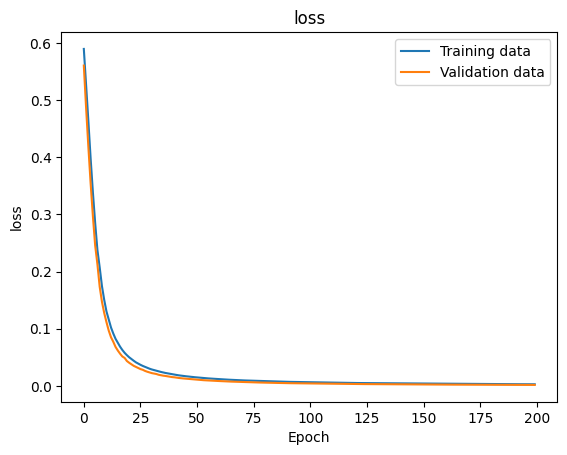

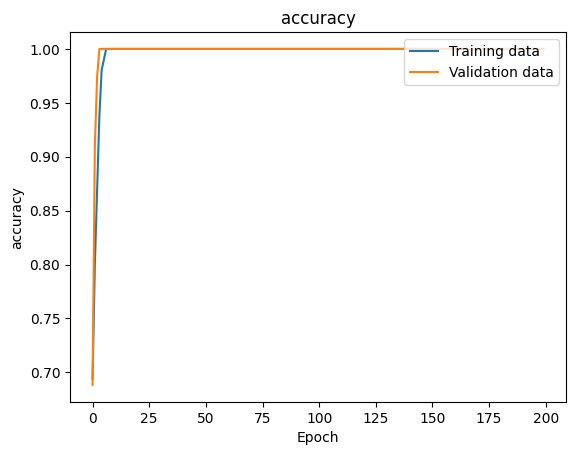

In [7]:
plot_metric(history, "loss")
plot_metric(history, "accuracy")

In [17]:
import polars as pl

In [21]:
pl.DataFrame({'loss':history.history['loss'],'accuracy':history.history['accuracy']}).head(10)

loss,accuracy
f64,f64
0.589651,0.694079
0.527883,0.799342
0.463773,0.868421
0.398286,0.9375
0.338738,0.980263
0.285246,0.990132
0.237718,1.0
0.207335,1.0
0.174578,1.0


### Imagen 2

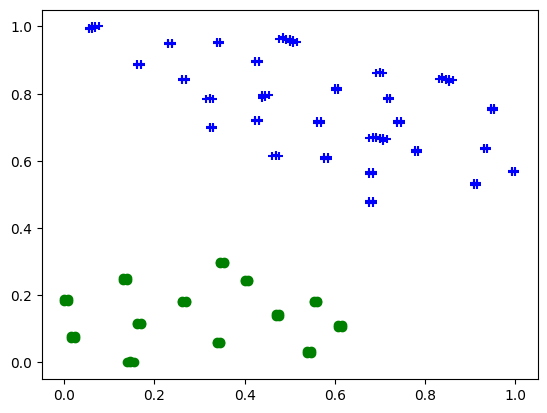

In [22]:
file_name = "Imagen 2.bmp" # Nombre del archivo con la imagen a analizar

X = open_image(file_name)

X = np.random.permutation(X)
T = X[:, 2]    # Variable objetivo (Clase de 0 a N)
P = X[:, 0:2]  # Variables de entrada (X y Y de los píxeles no-blancos de la imagen)

# Número de clases del problema (Cantidad de colores no-blancos de la imagen)
nclases = max(T) + 1

# Crear la salida con codificación one-hot
T_OH = [T==0]
for i in range(1,nclases):
  T_OH = np.concatenate( (T_OH, [T==i]), axis=0)
T_OH = T_OH.astype(int).T

# Escalar la entrada a valores [0..1]
column_min_values = np.min(P, axis=0)
P = (P - column_min_values) / (np.max(P, axis=0) - column_min_values)

# Plotear la imagen
plot_image(P, T)

In [23]:
# Crear una red que sea capaz de resolver el problema

d_in = 2  # Número de variables de entrada. Para este ejercicio debe ser 2 ya que
          # el dataset está formado por dos variables: el valor X y Y de cada pixel
          # no-blanco de la imagen
d_out = nclases # Número de salidas. La misma que la cantidad de clases (usando one_hot)

modelo = keras.Sequential([
    keras.layers.Dense(5, input_shape=(d_in,), activation="tanh"),
    keras.layers.Dense(d_out, activation="softmax")
	])

modelo.compile(
  optimizer = keras.optimizers.SGD(learning_rate=0.1),
  loss = 'categorical_crossentropy', metrics = ['accuracy']
)

modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 15        
                                                                 
 dense_5 (Dense)             (None, 2)                 12        
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Entrenamiento del modelo y ploteo de las métricas
history = modelo.fit(P, T_OH, epochs=200, batch_size=16, verbose=False, validation_split=0.2)

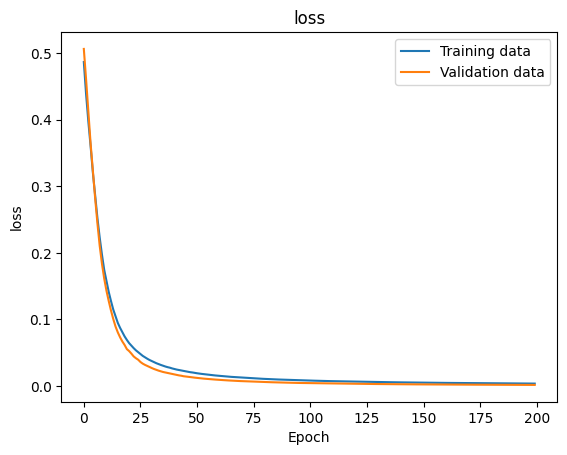

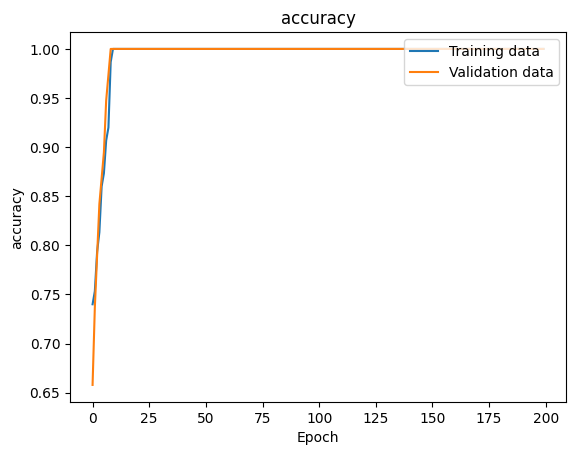

In [25]:
plot_metric(history, "loss")
plot_metric(history, "accuracy")

In [26]:
pl.DataFrame({'loss':history.history['loss'],'accuracy':history.history['accuracy']}).head(10)

loss,accuracy
f64,f64
0.486671,0.74
0.438304,0.753333
0.397094,0.793333
0.360049,0.813333
0.32041,0.86
0.285903,0.873333
0.252439,0.906667
0.223116,0.92
0.197353,0.986667


### Imagen 3

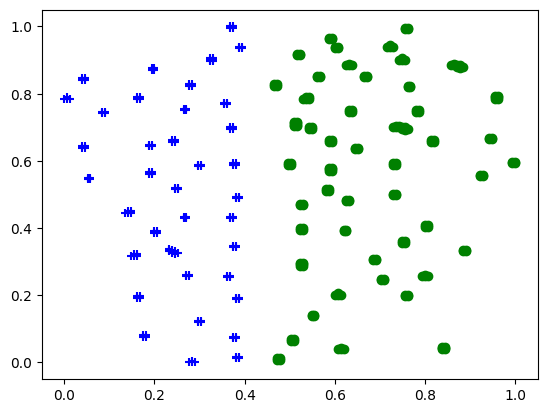

In [31]:
file_name = "Imagen 3.bmp" # Nombre del archivo con la imagen a analizar

X = open_image(file_name)

X = np.random.permutation(X)
T = X[:, 2]    # Variable objetivo (Clase de 0 a N)
P = X[:, 0:2]  # Variables de entrada (X y Y de los píxeles no-blancos de la imagen)

# Número de clases del problema (Cantidad de colores no-blancos de la imagen)
nclases = max(T) + 1

# Crear la salida con codificación one-hot
T_OH = [T==0]
for i in range(1,nclases):
  T_OH = np.concatenate( (T_OH, [T==i]), axis=0)
T_OH = T_OH.astype(int).T

# Escalar la entrada a valores [0..1]
column_min_values = np.min(P, axis=0)
P = (P - column_min_values) / (np.max(P, axis=0) - column_min_values)

# Plotear la imagen
plot_image(P, T)

In [32]:
# Crear una red que sea capaz de resolver el problema

d_in = 2  # Número de variables de entrada. Para este ejercicio debe ser 2 ya que
          # el dataset está formado por dos variables: el valor X y Y de cada pixel
          # no-blanco de la imagen
d_out = nclases # Número de salidas. La misma que la cantidad de clases (usando one_hot)

modelo = keras.Sequential([
    keras.layers.Dense(5, input_shape=(d_in,), activation="tanh"),
    keras.layers.Dense(d_out, activation="softmax")
	])

modelo.compile(
  optimizer = keras.optimizers.SGD(learning_rate=0.1),
  loss = 'categorical_crossentropy', metrics = ['accuracy']
)

modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 15        
                                                                 
 dense_7 (Dense)             (None, 2)                 12        
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Entrenamiento del modelo y ploteo de las métricas
history = modelo.fit(P, T_OH, epochs=200, batch_size=16, verbose=False, validation_split=0.2)

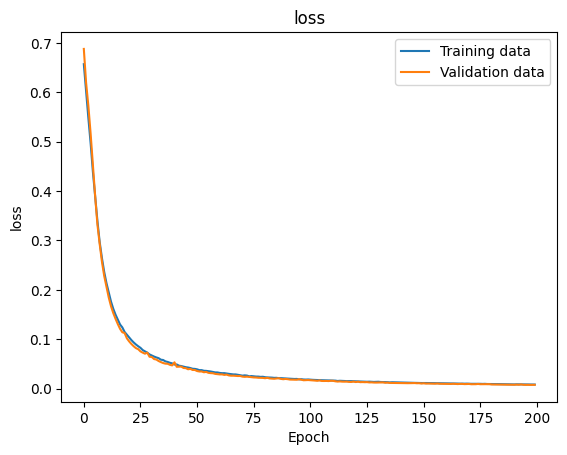

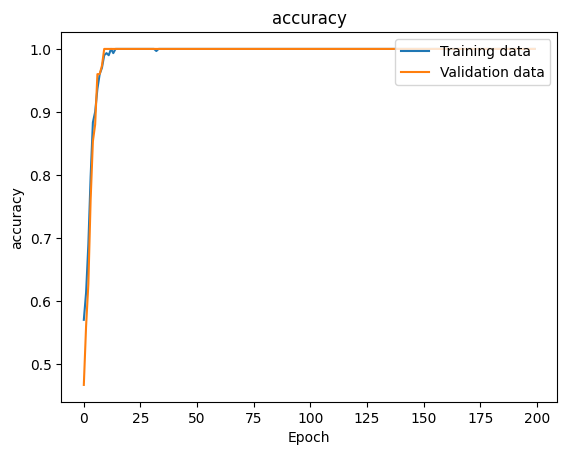

In [34]:
plot_metric(history, "loss")
plot_metric(history, "accuracy")

In [39]:
pl.DataFrame({'loss':history.history['loss'],'accuracy':history.history['accuracy']})[75:100]

loss,accuracy
f64,f64
0.024816,1.0
0.024384,1.0
0.0243,1.0
0.023747,1.0
0.023973,1.0
0.023061,1.0
0.02265,1.0
0.022488,1.0
0.022239,1.0


### Imagen 4

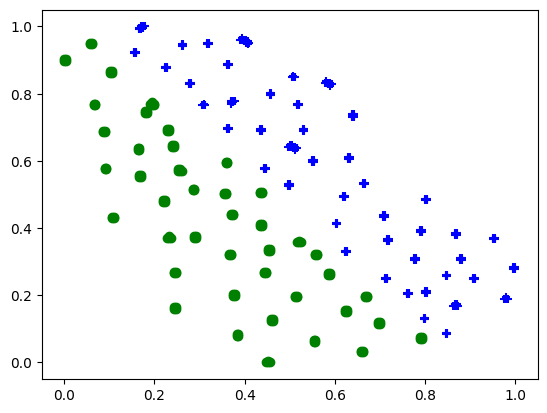

In [40]:
file_name = "Imagen 4.bmp" # Nombre del archivo con la imagen a analizar

X = open_image(file_name)

X = np.random.permutation(X)
T = X[:, 2]    # Variable objetivo (Clase de 0 a N)
P = X[:, 0:2]  # Variables de entrada (X y Y de los píxeles no-blancos de la imagen)

# Número de clases del problema (Cantidad de colores no-blancos de la imagen)
nclases = max(T) + 1

# Crear la salida con codificación one-hot
T_OH = [T==0]
for i in range(1,nclases):
  T_OH = np.concatenate( (T_OH, [T==i]), axis=0)
T_OH = T_OH.astype(int).T

# Escalar la entrada a valores [0..1]
column_min_values = np.min(P, axis=0)
P = (P - column_min_values) / (np.max(P, axis=0) - column_min_values)

# Plotear la imagen
plot_image(P, T)

In [47]:
# Crear una red que sea capaz de resolver el problema

d_in = 2  # Número de variables de entrada. Para este ejercicio debe ser 2 ya que
          # el dataset está formado por dos variables: el valor X y Y de cada pixel
          # no-blanco de la imagen
d_out = nclases # Número de salidas. La misma que la cantidad de clases (usando one_hot)

modelo = keras.Sequential([
    keras.layers.Dense(5, input_shape=(d_in,), activation="tanh"),
    keras.layers.Dense(d_out, activation="softmax")
	])

modelo.compile(
  optimizer = keras.optimizers.SGD(learning_rate=0.1),
  loss = 'categorical_crossentropy', metrics = ['accuracy']
)

modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 5)                 15        
                                                                 
 dense_11 (Dense)            (None, 2)                 12        
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# Entrenamiento del modelo y ploteo de las métricas
history = modelo.fit(P, T_OH, epochs=200, batch_size=16, verbose=False, validation_split=0.2)

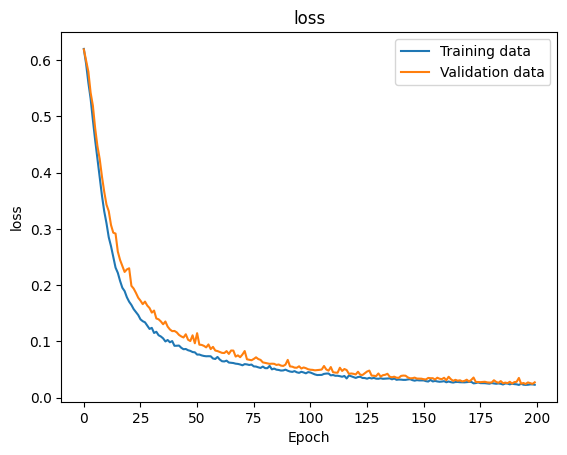

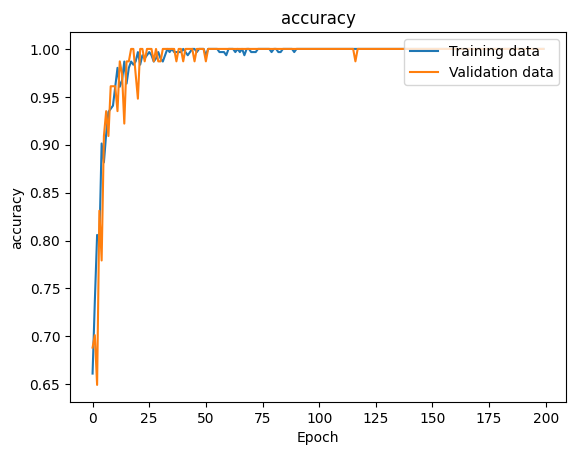

In [49]:
plot_metric(history, "loss")
plot_metric(history, "accuracy")

In [52]:
pl.DataFrame({'loss':history.history['loss'],'accuracy':history.history['accuracy']}).head(10)

loss,accuracy
f64,f64
0.620023,0.661184
0.593773,0.736842
0.560128,0.805921
0.531634,0.799342
0.493552,0.901316
0.457836,0.881579
0.424732,0.911184
0.391852,0.934211
0.359254,0.9375


### Imagen 5

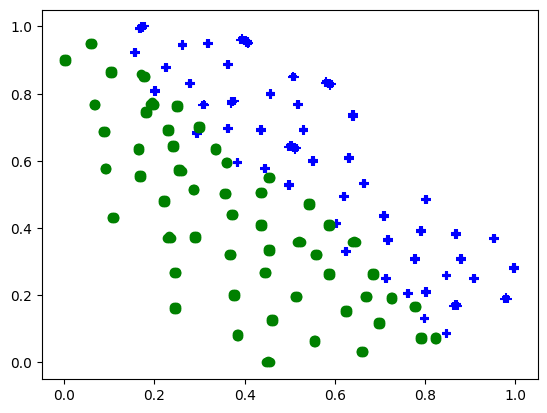

In [53]:
file_name = "Imagen 5.bmp" # Nombre del archivo con la imagen a analizar

X = open_image(file_name)

X = np.random.permutation(X)
T = X[:, 2]    # Variable objetivo (Clase de 0 a N)
P = X[:, 0:2]  # Variables de entrada (X y Y de los píxeles no-blancos de la imagen)

# Número de clases del problema (Cantidad de colores no-blancos de la imagen)
nclases = max(T) + 1

# Crear la salida con codificación one-hot
T_OH = [T==0]
for i in range(1,nclases):
  T_OH = np.concatenate( (T_OH, [T==i]), axis=0)
T_OH = T_OH.astype(int).T

# Escalar la entrada a valores [0..1]
column_min_values = np.min(P, axis=0)
P = (P - column_min_values) / (np.max(P, axis=0) - column_min_values)

# Plotear la imagen
plot_image(P, T)

In [73]:
# Crear una red que sea capaz de resolver el problema

d_in = 2  # Número de variables de entrada. Para este ejercicio debe ser 2 ya que
          # el dataset está formado por dos variables: el valor X y Y de cada pixel
          # no-blanco de la imagen
d_out = nclases # Número de salidas. La misma que la cantidad de clases (usando one_hot)

modelo = keras.Sequential([
    keras.layers.Dense(5, input_shape=(d_in,), activation="tanh"),
    keras.layers.Dense(d_out, activation="softmax")
	])

modelo.compile(
  optimizer = keras.optimizers.SGD(learning_rate=0.01),
  loss = 'categorical_crossentropy', metrics = ['accuracy']
)

modelo.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 5)                 15        
                                                                 
 dense_22 (Dense)            (None, 2)                 12        
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
# Entrenamiento del modelo y ploteo de las métricas
history = modelo.fit(P, T_OH, epochs=400, batch_size=16, verbose=False, validation_split=0.2)

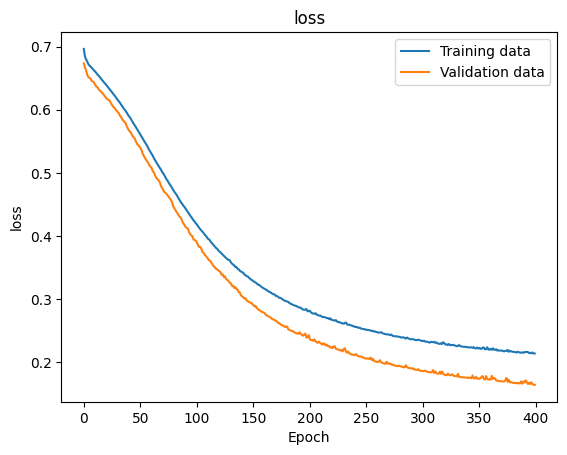

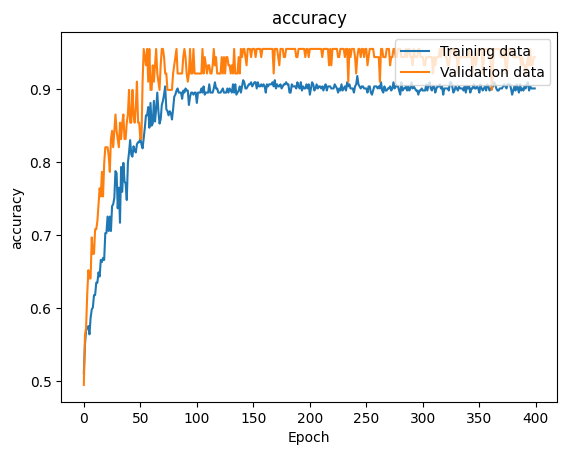

In [75]:
plot_metric(history, "loss")
plot_metric(history, "accuracy")

In [78]:
pl.DataFrame({'loss':history.history['loss'],'accuracy':history.history['accuracy']})[100:120]

loss,accuracy
f64,f64
0.418213,0.88102
0.415788,0.895184
0.413109,0.895184
0.410541,0.895184
0.408683,0.90085
0.406758,0.895184
0.404488,0.903683
0.401842,0.892351
0.400141,0.895184


### Imagen 6

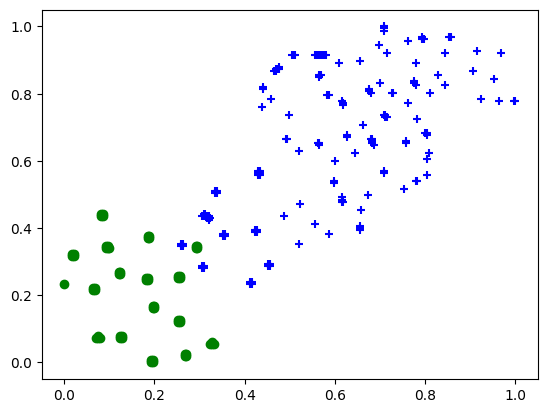

In [79]:
file_name = "Imagen 6.bmp" # Nombre del archivo con la imagen a analizar

X = open_image(file_name)

X = np.random.permutation(X)
T = X[:, 2]    # Variable objetivo (Clase de 0 a N)
P = X[:, 0:2]  # Variables de entrada (X y Y de los píxeles no-blancos de la imagen)

# Número de clases del problema (Cantidad de colores no-blancos de la imagen)
nclases = max(T) + 1

# Crear la salida con codificación one-hot
T_OH = [T==0]
for i in range(1,nclases):
  T_OH = np.concatenate( (T_OH, [T==i]), axis=0)
T_OH = T_OH.astype(int).T

# Escalar la entrada a valores [0..1]
column_min_values = np.min(P, axis=0)
P = (P - column_min_values) / (np.max(P, axis=0) - column_min_values)

# Plotear la imagen
plot_image(P, T)

In [89]:
del modelo

In [90]:
# Crear una red que sea capaz de resolver el problema

d_in = 2  # Número de variables de entrada. Para este ejercicio debe ser 2 ya que
          # el dataset está formado por dos variables: el valor X y Y de cada pixel
          # no-blanco de la imagen
d_out = nclases # Número de salidas. La misma que la cantidad de clases (usando one_hot)

modelo = keras.Sequential([
    keras.layers.Dense(5, input_shape=(d_in,), activation="tanh"),
    keras.layers.Dense(d_out, activation="softmax")
	])

modelo.compile(
  optimizer = keras.optimizers.SGD(learning_rate=0.01),
  loss = 'categorical_crossentropy', metrics = ['accuracy']
)

modelo.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 5)                 15        
                                                                 
 dense_30 (Dense)            (None, 2)                 12        
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
# Entrenamiento del modelo y ploteo de las métricas
history = modelo.fit(P, T_OH, epochs= 200, batch_size=16, verbose=False, validation_split=0.2)

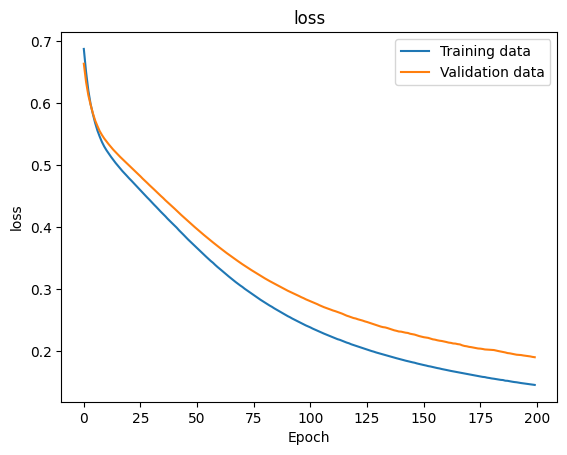

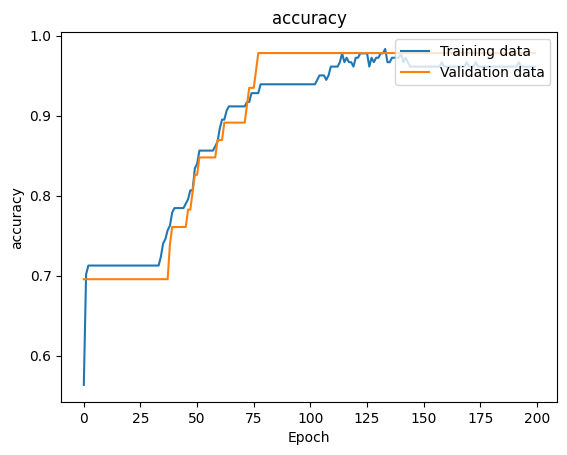

In [92]:
plot_metric(history, "loss")
plot_metric(history, "accuracy")